# Importing modules and pre-requisites
3 zones selected,
North = Hamburg
West = Cologne
East = Cottbus

In [1]:
import pypsa
import pandapower as pp
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import warnings
import subprocess
from shapely.errors import ShapelyDeprecationWarning
import logging

warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
logging.getLogger("pypsa.pf").setLevel(logging.WARNING)
plt.rc("figure", figsize=(10, 8))

### Create network and import data file

In [2]:
network = pypsa.Network()
network.set_snapshots(range(1))  # Solve for a year 365*24
type(network)
bus=pd.read_excel("C:\\Users\\onkar\\Desktop\\STUDY\\Market Integration of Renewable Sources\\PyPSA\\BTU_lectures_2024\\Lect_3\\data_exercise.xlsx",sheet_name='buses',header=0)

### Import Buses

In [3]:
bus

,bus,v_nom,carrier,x,y,Unnamed: 5
0,north_de,380,AC,53.558459,9.763017,Hamburg
1,east_de,380,AC,51.778140,14.222498,Cottbus
2,west_de,380,AC,50.957587,6.802517,Cologne


In [4]:
network.madd(
    "Bus",
    names= bus.bus,
    v_nom=list(bus.v_nom),
    carrier=list(bus.carrier),  # MW
    x=list( bus.x),
    y=list(bus.y),
)
network.buses

C:\Users\onkar\AppData\Local\Temp\ipykernel_18448\3350768405.py:1: DeprecatedWarning: madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.
  network.madd(


,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network
Bus,,,,,,,,,,,,
north_de,380.0,,53.558459,9.763017,AC,,1.0,0.0,inf,PQ,,
east_de,380.0,,51.778140,14.222498,AC,,1.0,0.0,inf,PQ,,
west_de,380.0,,50.957587,6.802517,AC,,1.0,0.0,inf,PQ,,


### Import Generators

In [5]:
generators=pd.read_excel("C:\\Users\\onkar\\Desktop\\STUDY\\Market Integration of Renewable Sources\\PyPSA\\BTU_lectures_2024\\Lect_3\\data_exercise.xlsx",sheet_name='generators',header=0)

generators

,generator,p_nom,p_nom_max,bus,p_nom_extendable,marginal_cost,lifetime,efficiency,start_up_cost,shut_down_cost,min_up_time,min_down_time,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down
0,gen_no1,15,NaN,north_de,False,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,gen_no2,16,NaN,north_de,False,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gen_no3,9,NaN,north_de,False,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,gen_ost1,10,NaN,east_de,False,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,gen_ost2,9,NaN,east_de,False,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,gen_ost3,5,NaN,east_de,False,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,gen_west1,30,NaN,west_de,False,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,gen_west2,10,NaN,west_de,False,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,gen_west3,15,NaN,west_de,False,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
network.madd(
    "Generator",
    names= generators.generator,
    bus=list(generators.bus),
    carrier=list(generators.generator),
    p_nom=list(generators.p_nom),
    p_nom_extendable=list(generators.p_nom_extendable),
    marginal_cost=list(generators.marginal_cost),
)
network.generators

C:\Users\onkar\AppData\Local\Temp\ipykernel_18448\2744208940.py:1: DeprecatedWarning: madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.
  network.madd(


,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,p_set,e_sum_min,e_sum_max,q_set,sign,carrier,marginal_cost,marginal_cost_quadratic,active,build_year,lifetime,capital_cost,efficiency,committable,start_up_cost,shut_down_cost,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
gen_no1,north_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no1,10.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no2,north_de,PQ,,16.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no2,15.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_no3,north_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_no3,30.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost1,east_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost1,15.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost2,east_de,PQ,,9.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost2,20.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_ost3,east_de,PQ,,5.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_ost3,35.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west1,west_de,PQ,,30.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west1,25.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west2,west_de,PQ,,10.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west2,40.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
gen_west3,west_de,PQ,,15.0,0.0,False,0.0,inf,0.0,1.0,0.0,-inf,inf,0.0,1.0,gen_west3,45.0,0.0,True,0,inf,0.0,1.0,False,0.0,0.0,0.0,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


### Import Loads

In [7]:
load=pd.read_excel("C:\\Users\\onkar\\Desktop\\STUDY\\Market Integration of Renewable Sources\\PyPSA\\BTU_lectures_2024\\Lect_3\\data_exercise.xlsx",sheet_name='load',header=0)

load

,line,bus,p_set
0,1,north_de,10
1,2,east_de,10
2,3,west_de,40


In [8]:
network.madd(
    "Load",
    names= load.bus,
    bus=list(load.bus),
    p_set=list(load.p_set),
)
network.loads

C:\Users\onkar\AppData\Local\Temp\ipykernel_18448\678921325.py:1: DeprecatedWarning: madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.
  network.madd(


,bus,carrier,type,p_set,q_set,sign,active
Load,,,,,,,
north_de,north_de,,,10.0,0.0,-1.0,True
east_de,east_de,,,10.0,0.0,-1.0,True
west_de,west_de,,,40.0,0.0,-1.0,True


### Import Trasmission Lines

In [9]:
lines=pd.read_excel("C:\\Users\\onkar\\Desktop\\STUDY\\Market Integration of Renewable Sources\\PyPSA\\BTU_lectures_2024\\Lect_3\\data_exercise.xlsx",sheet_name='lines',header=0)

lines

,line,bus0,bus1,s_nom,s_nom_extendable,length
0,1,north_de,east_de,500,True,400
1,2,east_de,west_de,500,True,400
2,3,west_de,north_de,500,True,400


In [10]:
network.madd(
    "Line",
    names= lines.line,
    bus0=list(lines.bus0),
    bus1=list(lines.bus1),
    s_nom=list(lines.s_nom),
    s_nom_extendable=list(lines.s_nom_extendable),
    length=list(lines.length),
    x=1,
)
network.lines

C:\Users\onkar\AppData\Local\Temp\ipykernel_18448\89322980.py:1: DeprecatedWarning: madd is deprecated as of 0.31 and will be removed in 1.0. Use `n.add` as a drop-in replacement instead.
  network.madd(


,bus0,bus1,type,x,r,g,b,s_nom,s_nom_mod,s_nom_extendable,s_nom_min,s_nom_max,s_max_pu,capital_cost,active,build_year,lifetime,length,carrier,terrain_factor,num_parallel,v_ang_min,v_ang_max,sub_network,x_pu,r_pu,g_pu,b_pu,x_pu_eff,r_pu_eff,s_nom_opt
Line,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,north_de,east_de,,1.0,0.0,0.0,0.0,500.0,0.0,True,0.0,inf,1.0,0.0,True,0,inf,400.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,east_de,west_de,,1.0,0.0,0.0,0.0,500.0,0.0,True,0.0,inf,1.0,0.0,True,0,inf,400.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,west_de,north_de,,1.0,0.0,0.0,0.0,500.0,0.0,True,0.0,inf,1.0,0.0,True,0,inf,400.0,,1.0,1.0,-inf,inf,,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
network

PyPSA Network
Components:
 - Bus: 3
 - Generator: 9
 - Line: 3
 - Load: 3
Snapshots: 1

### Solve the network

In [12]:
network.optimize(solver_name='highs')

Index(['1', '2', '3'], dtype='object', name='Line')
Index(['1', '2', '3'], dtype='object', name='Line')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['gen_no1', 'gen_no2', 'gen_no3', 'gen_ost1', 'gen_ost2', 'gen_ost3',
       'gen_west1', 'gen_west2', 'gen_west3'],
      dtype='object', name='Generator')
Index(['1', '2', '3'], dtype='object', name='Line')
Index(['1', '2', '3'], dtype='object', name='Line')
Index(['north_de', 'east_de', 'west_de'], dtype='object', name='Bus')
Index(['gen_no1', 'gen_no2', 'gen_no3', 'gen_ost1', 'gen_ost2', 'gen_ost3',
       'gen_west1', 'gen_west2', 'gen_west3'],
      dtype='object', name='Generator')
c:\Users\onkar\.conda\envs\pypsa\Lib\site-packages\linopy\common.py:147: UserWarning: coords for dimension(s) ['Generator'] is not aligned with the pandas object. Previously, the indexes of the pandas were ignored and overwritten in these cases. Now, the pandas object's coordinates are taken considered for alignment.
  warn(

('ok', 'optimal')

### Visualisation of Results

In [13]:
network.buses_t.marginal_price

clearing_price_redisp = network.buses_t.marginal_price.iloc[0].max()
clearing_price_redisp

25.0

bus       carrier  
east_de   gen_ost1     10.0
          gen_ost2      9.0
          gen_ost3      0.0
north_de  gen_no1      15.0
          gen_no2      16.0
          gen_no3       0.0
west_de   gen_west1    10.0
          gen_west2     0.0
          gen_west3     0.0
Name: g, dtype: float64

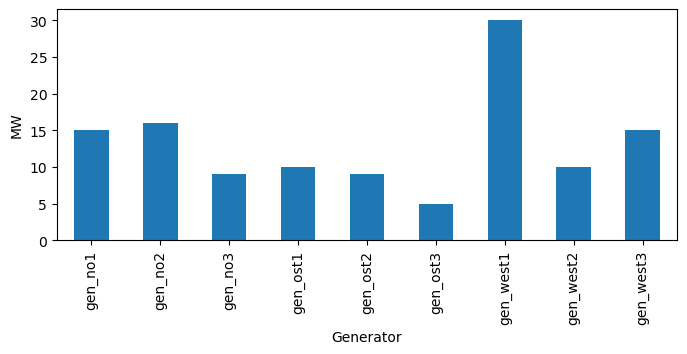

In [14]:
network.generators.p_nom_opt

network.generators.p_nom_opt.plot.bar(ylabel="MW", figsize=(8, 3))

network.lines_t.p0

gen = network.generators.assign(g=network.generators_t.p.mean()).groupby(["bus", "carrier"]).g.sum()
gen

In [15]:
flow = pd.Series(10, index=network.branches().index)
flow

component  name
Line       1       10
           2       10
           3       10
dtype: int64

c:\Users\onkar\.conda\envs\pypsa\Lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


ValueError: Colors not defined for all elements in the second MultiIndex 

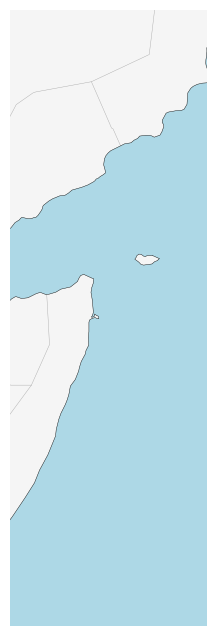

In [16]:
plot_graph=network.plot(
    bus_sizes=gen/10,
    bus_colors={"Germany Wind":"midnightblue","Germany Coal": "black", "Germany Gas": "gray","France Gas":"gray","France Wind":"midnightblue","France Hydro":"cyan","Belgium Solar":"yellow","Belgium Gas":"gray"},
    margin=1,
    line_widths=3,
    link_widths=0,
    flow=flow,
    color_geomap=True,
    projection=ccrs.EqualEarth(),
    line_colors=network.lines_t.p0.mean().abs(),
)
plt.colorbar(plot_graph[2], fraction=0.04, pad=0.004, label="Flow in MW")
plt.show()